In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from matplotlib import cm

target_colors = ['#ffa300', '#9b19f5']

In [2]:
df = pd.read_csv('/kaggle/input/airline-passenger-satisfaction/train.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

# Target Distribution:

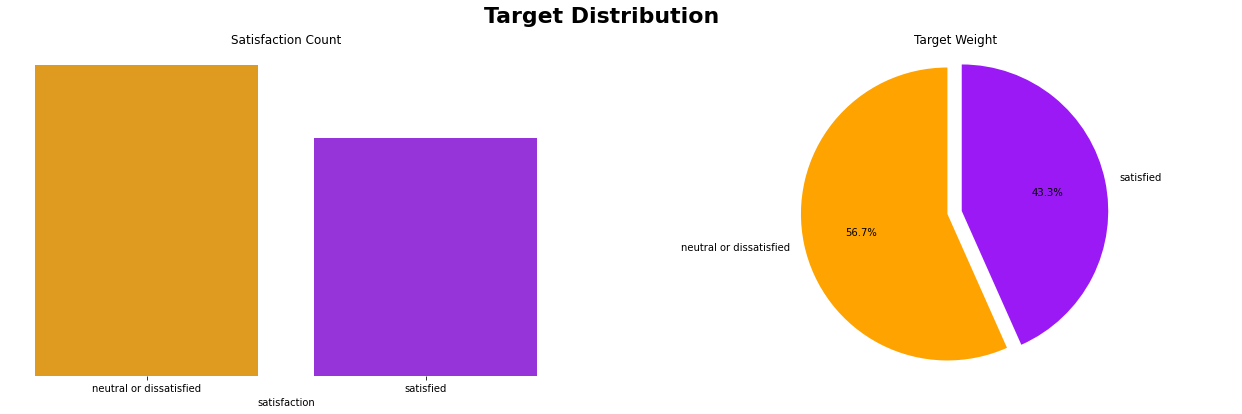

In [4]:
#define the figure

fig = plt.figure(figsize=(22,6))
plt.suptitle('Target Distribution', weight='bold', fontsize='22', fontname='moonspace')
grid = gridspec.GridSpec(1, 2, figure=fig)
ax1 = fig.add_subplot(grid[0,:1])
ax1.set_title('Satisfaction Count')

#with help of seaborn, we are drawing the countplot
sns.countplot(x='satisfaction', data=df, ax=ax1, palette=target_colors)

#second subplot
ax2 = fig.add_subplot(grid[0,1:])
ax2.set_title('Target Weight')
label = list(df['satisfaction'].value_counts().index)
value = list(df['satisfaction'].value_counts().values)



#to remove borders
for spine in ax1.spines.values():
    spine.set_visible(False)

# for index,value in enumerate(df['satisfaction'].value_counts()):
#     ax1.annotate(value,xy=(index+2000), ha='center', va='center', fontsize=15)

#to remove axis
ax1.get_yaxis().set_visible(False)



#pie chart
ax2.pie(value, labels=label, autopct='%1.1f%%', explode=(0,0.1), startangle=90, colors=target_colors)
ax2.axis('equal')
plt.show()